# Bayesian Classification for Machine Learning for Computational Linguistics

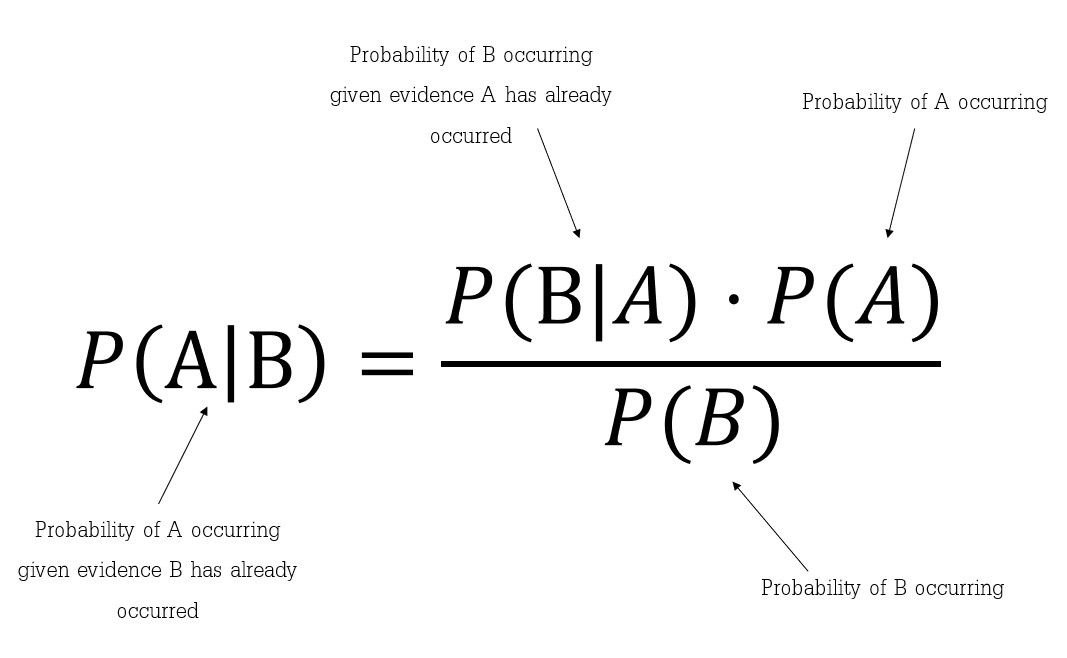



---

Sia 𝑺 - una stringa di input, 𝑫 - un corpus di 𝒛 documenti, 𝑪 - un insieme di 𝒎 classi:



Calcolo della classe 𝑪ₛ del campione 𝑺, come segue:

  

1.   Suddividere il campione 𝑺 in un insieme di 𝒏-termini
2.   Per ogni 𝒌-esima classe 𝑪ₖ 𝒌=𝟭..𝒎 fare quanto segue:


*   Calcolare il vettore 𝑾 di 𝒏-feature ∀𝒘ₖᵢ ∈ 𝑾, dove 𝒘ₖᵢ è la frequenza con cui il corrispondente 𝒊-esimo termine.
* Valutare il priore 𝒑(𝑪ₖ) come l'intera probabilità che un documento sia presente nei documenti della classe 𝑪ₖ.
* Calcolare il posteriore 𝐏𝐫(𝑪ₖ | 𝑾) aggiungendo 𝒑(𝑪ₖ) alla somma delle probabilità 𝒘ᵢ di ciascun termine, dato 𝑪ₖ, 𝒑(𝒘ᵢ | 𝑪ₖ) :

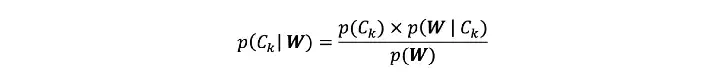

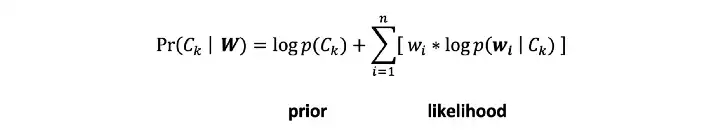

## Using token probabilities for classification

Supponiamo di avere un insieme di e-mail annotate come *spam* o *no-spam*.


Ci sono $4$ e-mail etichettate come *no-spam* e $2$ e-mail etichettata come *spam*, cioè abbiamo un totale di $6$ testi nel nostro corpus.

Se scegliessimo a caso un'e-mail dalla raccolta, la probabilità di scegliere un'e-mail di spam sarebbe di $1 / 3$.

Le e-mail di spam possono differire solo per alcune parole. Ecco un esempio di e-mail costruita con parole chiave tipiche:

In [ ]:
spam = [ """No diagnostics needed.
            We guarantee Fast Viagra delivery.
            We can provide Human growth hormone. 
            The cheapest Life Insurance with us. 
            You can Lose weight with this treatment.
            Our Medicine now and No medical exams necessary.
            Our Online pharmacy is the best.  
            This cream Removes wrinkles and Reverses aging.
            One treatment and you will Stop snoring.  
            Our Vicodin will help with Weight loss. Cheap Xanax.
            My name is Bill Gates, and I would like to invite you to this rich occasion.
            """,
        """This is an opportunity not to be missed.
          Unique gift just for you!
          Buy and sell Bitcoin at a discounted price.
          """
         ]

La struttura di dati qui sopra è un elenco di stringhe che contiene solo una stringa. Le virgolette triple doppie contrassegnano il testo multilinea. Possiamo ottenere la dimensione della variabile *spam* in questo modo:

In [ ]:
print(len(spam))

2


In [ ]:
no_spam = [ """Hi Hans, hope to see you soon at our family party.
           When will you arrive.
           All the best to the family.
           Sue""",
      """Dear Ata,
         did you receive my last email related to the car insurance
         offer? I would be happy to discuss the details with you.
         Please give me a call, if you have any questions.
         John Smith
         Super Car Insurance""",
      """Hi everyone:
         This is just a gentle reminder of today's first 2017 SLS
         Colloquium, from 2.30 to 4.00 pm, in Ballantine 103.
         Rodica Frimu will present a job talk entitled "What is
         so tricky in subject-verb agreement?". The text of the
         abstract is below.
         If you would like to present something during the Spring,
         please let me know.
         The current online schedule with updated title
         information and abstracts is available under:
         http://www.iub.edu/~psyling/SLSColloquium/Spring2017.html
         See you soon,
         Peter""",
      """Dear Friends,
         As our first event of 2017, the Polish Studies Center
         presents an evening with artist and filmmaker Wojtek Sawa.
         Please join us on JANUARY 26, 2017 from 5:30 p.m. to
         7:30 p.m. in the Global and International Studies
         Building room 1100 for a presentation by Wojtek Sawa
         on his interactive  installation art piece The Wall
         Speaks–Voices of the Unheard. A reception will follow
         the event where you will have a chance to meet the artist
         and discuss his work.
         Best,"""]


In [ ]:
print(no_spam[3].lower())

dear friends,
         as our first event of 2017, the polish studies center
         presents an evening with artist and filmmaker wojtek sawa.
         please join us on january 26, 2017 from 5:30 p.m. to
         7:30 p.m. in the global and international studies
         building room 1100 for a presentation by wojtek sawa
         on his interactive  installation art piece the wall
         speaks–voices of the unheard. a reception will follow
         the event where you will have a chance to meet the artist
         and discuss his work.
         best,


In [ ]:
for text in no_spam:
    print(text.lower())

hi hans, hope to see you soon at our family party.
           when will you arrive.
           all the best to the family.
           sue
dear ata,
         did you receive my last email related to the car insurance
         offer? i would be happy to discuss the details with you.
         please give me a call, if you have any questions.
         john smith
         super car insurance
hi everyone:
         this is just a gentle reminder of today's first 2017 sls
         colloquium, from 2.30 to 4.00 pm, in ballantine 103.
         rodica frimu will present a job talk entitled "what is
         so tricky in subject-verb agreement?". the text of the
         abstract is below.
         if you would like to present something during the spring,
         please let me know.
         the current online schedule with updated title
         information and abstracts is available under:
         http://www.iub.edu/~psyling/slscolloquium/spring2017.html
         see you soon,
         peter
d

Possiamo usare il tokenizer di NLTK per tokenizzare il testo minuscolo in singoli token (parole e segni di punteggiatura):

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

print(word_tokenize(no_spam[0].lower()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['hi', 'hans', ',', 'hope', 'to', 'see', 'you', 'soon', 'at', 'our', 'family', 'party', '.', 'when', 'will', 'you', 'arrive', '.', 'all', 'the', 'best', 'to', 'the', 'family', '.', 'sue']


Possiamo contare il numero di token e di tipi nel testo minuscolo:

In [ ]:
from collections import Counter

myCounts = Counter(word_tokenize("This is a test. Will this test teach us how to count tokens?".lower()))

print(myCounts)
print("number of  types:", len(myCounts))
print("number of tokens:", sum(myCounts.values()))

Counter({'this': 2, 'test': 2, 'is': 1, 'a': 1, '.': 1, 'will': 1, 'teach': 1, 'us': 1, 'how': 1, 'to': 1, 'count': 1, 'tokens': 1, '?': 1})
number of  types: 13
number of tokens: 15


Ora possiamo creare un profilo di frequenza delle parole *no_spam* e *spam* date le due raccolte di testo:

In [ ]:
no_spamFP = Counter()
spamFP = Counter()

for text in spam:
    spamFP.update(word_tokenize(text.lower()))

for text in no_spam:
    no_spamFP.update(word_tokenize(text.lower()))

print("no_spam:\n",  no_spamFP)
print("-" * 50)
print("spam:\n", spamFP)

no_spam:
 Counter({'the': 14, ',': 11, '.': 11, 'to': 8, 'you': 8, 'a': 6, 'will': 4, 'is': 4, 'of': 4, 'and': 4, 'with': 3, 'please': 3, ':': 3, '2017': 3, 'in': 3, 'hi': 2, 'see': 2, 'soon': 2, 'our': 2, 'family': 2, 'best': 2, 'dear': 2, 'car': 2, 'insurance': 2, '?': 2, 'would': 2, 'discuss': 2, 'me': 2, 'if': 2, 'have': 2, 'first': 2, 'from': 2, 'present': 2, 'event': 2, 'studies': 2, 'artist': 2, 'wojtek': 2, 'sawa': 2, 'on': 2, 'p.m.': 2, 'his': 2, 'hans': 1, 'hope': 1, 'at': 1, 'party': 1, 'when': 1, 'arrive': 1, 'all': 1, 'sue': 1, 'ata': 1, 'did': 1, 'receive': 1, 'my': 1, 'last': 1, 'email': 1, 'related': 1, 'offer': 1, 'i': 1, 'be': 1, 'happy': 1, 'details': 1, 'give': 1, 'call': 1, 'any': 1, 'questions': 1, 'john': 1, 'smith': 1, 'super': 1, 'everyone': 1, 'this': 1, 'just': 1, 'gentle': 1, 'reminder': 1, 'today': 1, "'s": 1, 'sls': 1, 'colloquium': 1, '2.30': 1, '4.00': 1, 'pm': 1, 'ballantine': 1, '103.': 1, 'rodica': 1, 'frimu': 1, 'job': 1, 'talk': 1, 'entitled': 1, '`

In [ ]:
from math import log

tokenlist = []
frqprofiles = []


for x in spam:
    frqprofiles.append( Counter(word_tokenize(x.lower())) )
    tokenlist.append( set(word_tokenize(x.lower())) )
for x in no_spam:
    frqprofiles.append( Counter(word_tokenize(x.lower())) )
    tokenlist.append( set(word_tokenize(x.lower())) )

for x in frqprofiles[0]:
    frq = frqprofiles[0][x]
    counter = 0
    for y in tokenlist:
        if x in y:
            counter += 1
    print(x, frq * log(len(tokenlist)/counter, 2))


no 5.169925001442312
diagnostics 2.584962500721156
needed 2.584962500721156
. 0.0
we 5.169925001442312
guarantee 2.584962500721156
fast 2.584962500721156
viagra 2.584962500721156
delivery 2.584962500721156
can 5.169925001442312
provide 2.584962500721156
human 2.584962500721156
growth 2.584962500721156
hormone 2.584962500721156
the 0.5260688116675876
cheapest 2.584962500721156
life 2.584962500721156
insurance 1.5849625007211563
with 1.7548875021634687
us 1.5849625007211563
you 0.0
lose 2.584962500721156
weight 5.169925001442312
this 3.0
treatment 5.169925001442312
our 3.0
medicine 2.584962500721156
now 2.584962500721156
and 2.3398500028846247
medical 2.584962500721156
exams 2.584962500721156
necessary 2.584962500721156
online 1.5849625007211563
pharmacy 2.584962500721156
is 2.0
best 1.0
cream 2.584962500721156
removes 2.584962500721156
wrinkles 2.584962500721156
reverses 2.584962500721156
aging 2.584962500721156
one 2.584962500721156
will 1.1699250014423124
stop 2.584962500721156
snorin

La probabilità di scegliere a caso un'e-mail che sia spam o no_spam può essere calcolata come il rapporto tra i conteggi divisi per il numero di e-mail:

In [ ]:
total = len(spam) + len(no_spam)

spamP = len(spam) / total
no_spamP  = len(no_spam) / total

print("probability to pick spam:", spamP)
print("probability to pick  no_spam:", no_spamP)

probability to pick spam: 0.3333333333333333
probability to pick  no_spam: 0.6666666666666666


Il conteggio totale dei token ci servirà per calcolare la frequenza relativa dei token, cioè per generare stime di verosimiglianza. 

Potremmo *forzatamente* aggiungerne uno per creare spazio nella massa di probabilità per i token sconosciuti.

In [ ]:
totalSpam = sum(spamFP.values()) + 1
totalNo_spam  = sum(no_spamFP.values()) + 1

print("total spam counts + 1:", totalSpam)
print("total  ham counts + 1:", totalNo_spam)

total spam counts + 1: 118
total  ham counts + 1: 251


Ora possiamo relativizzare i conteggi nei profili di frequenza:

In [ ]:
no_spamFP  = Counter( dict([ (token, frequency/totalNo_spam)  for token, frequency in no_spamFP.items() ]) )
spamFP = Counter( dict([ (token, frequency/totalSpam) for token, frequency in spamFP.items() ]) )

print(no_spamFP)
print("-" * 30)
print(spamFP)

Counter({'the': 0.055776892430278883, ',': 0.043824701195219126, '.': 0.043824701195219126, 'to': 0.03187250996015936, 'you': 0.03187250996015936, 'a': 0.02390438247011952, 'will': 0.01593625498007968, 'is': 0.01593625498007968, 'of': 0.01593625498007968, 'and': 0.01593625498007968, 'with': 0.01195219123505976, 'please': 0.01195219123505976, ':': 0.01195219123505976, '2017': 0.01195219123505976, 'in': 0.01195219123505976, 'hi': 0.00796812749003984, 'see': 0.00796812749003984, 'soon': 0.00796812749003984, 'our': 0.00796812749003984, 'family': 0.00796812749003984, 'best': 0.00796812749003984, 'dear': 0.00796812749003984, 'car': 0.00796812749003984, 'insurance': 0.00796812749003984, '?': 0.00796812749003984, 'would': 0.00796812749003984, 'discuss': 0.00796812749003984, 'me': 0.00796812749003984, 'if': 0.00796812749003984, 'have': 0.00796812749003984, 'first': 0.00796812749003984, 'from': 0.00796812749003984, 'present': 0.00796812749003984, 'event': 0.00796812749003984, 'studies': 0.007968

Ora possiamo calcolare la probabilità predefinita che vogliamo assegnare alle parole sconosciute come $1 / totalSpam$ o $1 / totalHam$ rispettivamente. 

Ogni volta che incontriamo un token sconosciuto che non è presente nel nostro profilo di frequenza, gli assegneremo la probabilità predefinita.

In [ ]:
defaultSpam = 1 / totalSpam
defaultNo_Spam  = 1 / totalNo_spam

print("default spam probability:", defaultSpam)
print("default  No_spam probability:", defaultNo_Spam)

default spam probability: 0.00847457627118644
default  No_spam probability: 0.00398406374501992


Possiamo testare un documento sconosciuto calcolando la probabilità che sia stato generato dalla distribuzione *no_spamFP* o dalla distribuzione *spamFP*.

Dobbiamo tokenizzare il documento sconosciuto in minuscolo e calcolare il prodotto della probabilità di ogni singolo token nel testo. 

Questa probabilità deve essere scalata con la probabilità di scegliere casualmente un'e-mail spam o non. 

Calcoliamo la probabilità che l'e-mail casuale sia spam:

In [ ]:
unknownEmail = """Dear ,
we sell the cheapest and best Viagra on the planet. Our delivery is guaranteed confident and cheap.
"""
unknownEmail = """Dear Hans,
I have not seen you for so long. When will we go out for a coffee again.
"""

tokens = word_tokenize(unknownEmail.lower())

result = 1.0
for token in tokens:
    result *= spamFP.get(token, defaultSpam)

print(result * spamP)

2.7406314589019052e-43


Poiché questo numero è molto piccolo, una strategia migliore potrebbe essere quella di sommare le log-likhood:

In [ ]:
from math import log

resultSpam = 0.0
for token in tokens:
    resultSpam += log(spamFP.get(token, defaultSpam), 2)
resultSpam += log(spamP)

print(resultSpam)

-140.90204953051344


In [ ]:
resultNo_spam = 0.0
for token in tokens:
    resultNo_spam += log(no_spamFP.get(token, defaultNo_Spam), 2)
resultNo_spam += log(no_spamP)

print(resultNo_spam)

-155.81616593839203


La log-likhood per lo spam è maggiore di quella per *no-spam*. 

Il nostro semplice classificatore avrebbe indovinato che questa e-mail è *spam*.

In [ ]:
if max(resultNo_spam, resultSpam) == resultNo_spam:
    print("e-mail is ham")
else:
    print("e-mail is spam")

e-mail is spam
